In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
bikes = pd.read_csv("data/bikes_clean.csv")

In [3]:
# Select relevant features for clustering
numerical_features = ['Trip Duration', 'Temperature']
categorical_features = ['User Type', 'Age Groups', 'Season', 'Weekday']

# Preprocess categorical variables using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Fit and transform the data
bikes_preprocessed = preprocessor.fit_transform(bikes)

# Train K-Means clustering model
k = 3  # Number of clusters (can be adjusted based on analysis goals)
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(bikes_preprocessed)

# Add the cluster labels to your original DataFrame
bikes['Cluster'] = clusters

# Get the numerical part of the cluster centers
num_cluster_centers = kmeans.cluster_centers_[:, :len(numerical_features)]

# Inverse transform the numerical part of the cluster centers
scaler = StandardScaler()
scaler.fit(bikes[numerical_features])  # Fit the scaler on the original numerical features
num_cluster_centers = scaler.inverse_transform(num_cluster_centers)

# Create a DataFrame for the cluster centers with the original numerical feature names
cluster_centers_df = pd.DataFrame(num_cluster_centers, columns=numerical_features)

print("Cluster Centers:")
print(cluster_centers_df)

Cluster Centers:
   Trip Duration  Temperature
0     260.446085    13.085477
1     267.868174    16.857366
2     592.870356    14.793905


**Cluster 0**: The average trip duration is approximately **260.45** minutes, and the average temperature is around **13.09°C**. This cluster might represent shorter trips that occur in cooler weather conditions.
**Cluster 1**: The average trip duration is about **267.87** minutes, with a higher average temperature of **16.86°C**. This cluster could indicate trips that are slightly longer and occur in warmer weather.
**Cluster 2**: This cluster has a significantly longer average trip duration of **592.87** minutes and an average temperature of **14.79°C**. It seems to represent much longer trips that take place in moderately cool weather.

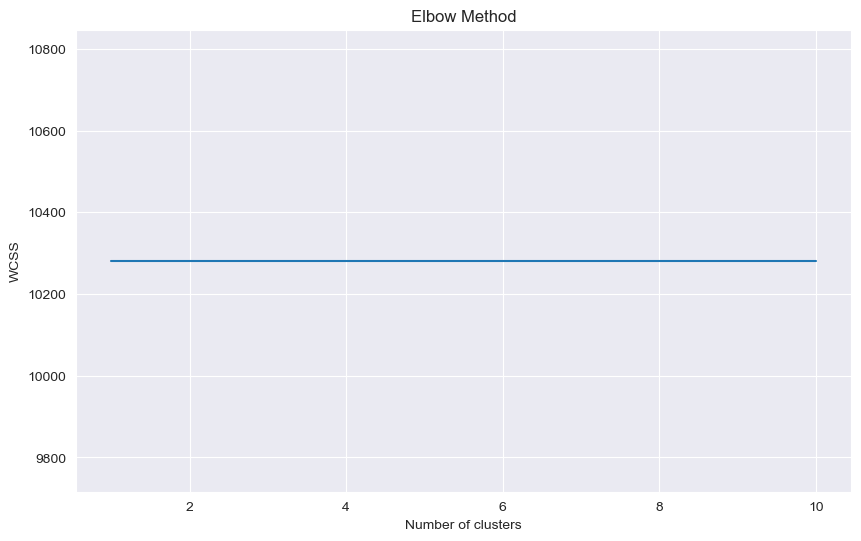

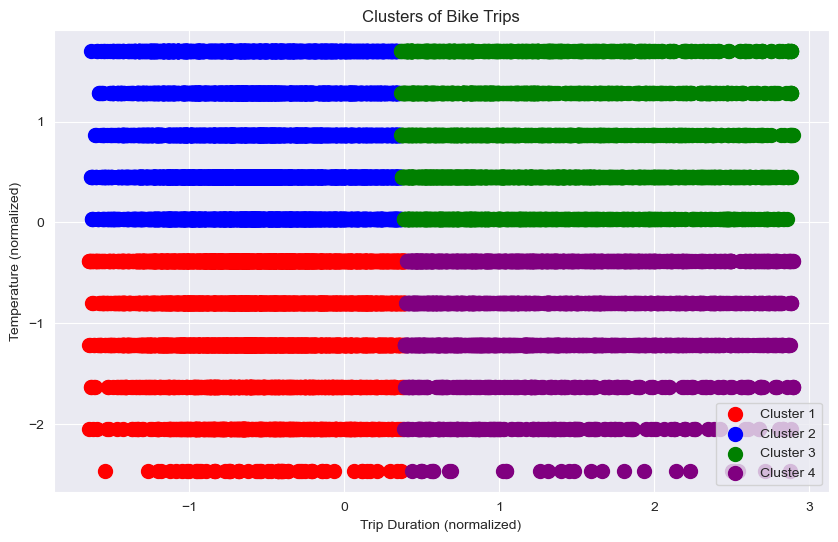

In [4]:
# Example: Using 'Trip Duration' and 'Temperature' for clustering
features = bikes[['Trip Duration', 'Temperature']]

# Data Preprocessing
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Choosing the Number of Clusters (k)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying K-Means Clustering with the chosen number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Adding cluster information to the DataFrame
bikes['Cluster'] = clusters

# Analyzing the Results
# Example: Visualizing the clusters for 'Trip Duration' and 'Temperature'
plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[clusters == 0, 0], features_scaled[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(features_scaled[clusters == 1, 0], features_scaled[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(features_scaled[clusters == 2, 0], features_scaled[clusters == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(features_scaled[clusters == 3, 0], features_scaled[clusters == 3, 1], s=100, c='purple', label='Cluster 4')
plt.title('Clusters of Bike Trips')
plt.xlabel('Trip Duration (normalized)')
plt.ylabel('Temperature (normalized)')
plt.legend()
plt.show()

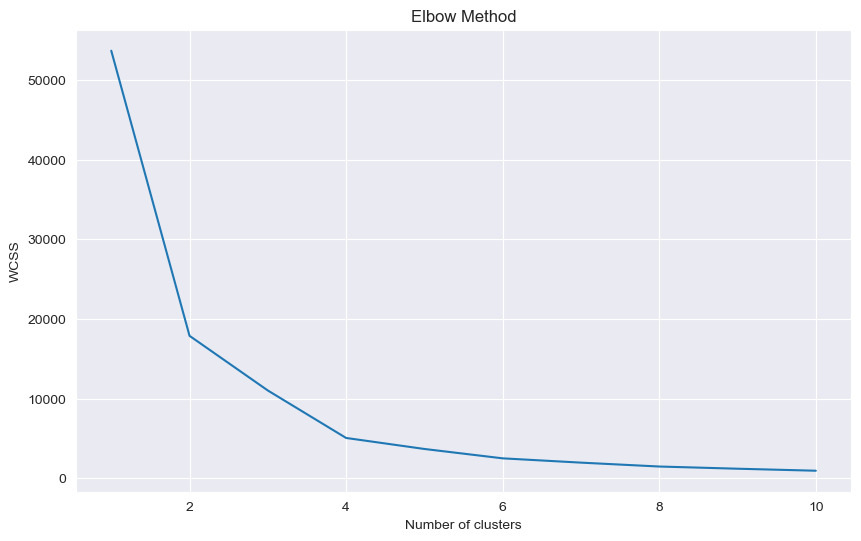

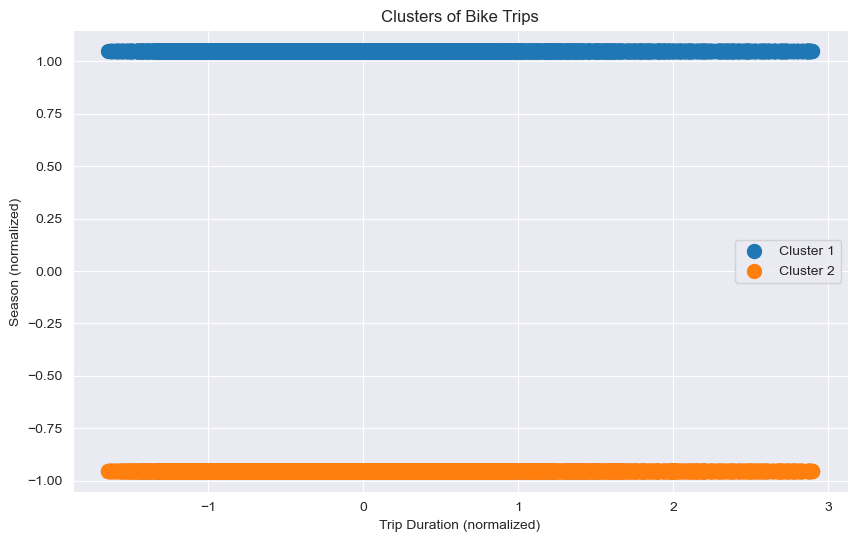

In [5]:
# One-hot encode the 'Season' column
season_encoded = pd.get_dummies(bikes['Season'])

# Combine 'Trip Duration' with the encoded 'Season' data
features = pd.concat([bikes[['Trip Duration']], season_encoded], axis=1)

# Data Preprocessing
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Choosing the Number of Clusters (k)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying K-Means Clustering with the chosen number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Adding cluster information to the DataFrame
bikes['Cluster'] = clusters

# Example: Visualizing the clusters for 'Trip Duration' and 'Season'
# Note: Adjust the indices in features_scaled[clusters == i, j] based on the new features DataFrame
plt.figure(figsize=(10, 6))
for i in range(2):
    plt.scatter(features_scaled[clusters == i, 0], features_scaled[clusters == i, 1], s=100, label=f'Cluster {i+1}')
plt.title('Clusters of Bike Trips')
plt.xlabel('Trip Duration (normalized)')
plt.ylabel('Season (normalized)')
plt.legend()
plt.show()